## Loading Data from CSV file

In [1]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# Create an empty dataframe
final_df =pd.DataFrame()

# Import dataset
df_modcloth = pd.read_csv('https://github.com/abdo-projects/data-science-portfolio/raw/main/Dataset/df_modcloth.csv')

# Show top results 
df_modcloth.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [2]:
# Check the format of 'Date' column
df_modcloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [3]:
# Check the format of 'Date' column
df_modcloth.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


## Data Transformation

In [4]:
# reorder and select columns related
df = df_modcloth[['timestamp','category']]

# Show top results
df.head()

,timestamp,category
0,2010-01-21 08:00:00+00:00,Dresses
1,2010-01-27 08:00:00+00:00,Dresses
2,2010-01-29 08:00:00+00:00,Dresses
3,2010-02-13 08:00:00+00:00,Dresses
4,2010-02-18 08:00:00+00:00,Dresses


In [5]:
# count the NaN values in a column in pandas DataFrame
df.isna().sum()

timestamp    0
category     0
dtype: int64

In [6]:
# Convert the Strings to Datetime and remove time in the DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Remove day from timestamp
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m')

# Sort a pandas dataframe based on DateTime field
df = df.sort_values(by='timestamp',ascending=True)

# Show top results
df.head()

<ipython-input-6-b09242fb41a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
<ipython-input-6-b09242fb41a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m')


,timestamp,category
0,2010-01,Dresses
1,2010-01,Dresses
2,2010-01,Dresses
3,2010-02,Dresses
4,2010-02,Dresses


In [7]:
# Copy dataframe for ML model
df_ml = df.copy()

# set year,month,day and time as new attribuates
#df['year'] = df['timestamp'].dt.year
#df['month'] = df['timestamp'].dt.month
#df['day'] = df['timestamp'].dt.day
#df['time'] = df['timestamp'].dt.time

# Show top results
df.head(10)

,timestamp,category
0,2010-01,Dresses
1,2010-01,Dresses
2,2010-01,Dresses
3,2010-02,Dresses
4,2010-02,Dresses
5,2010-02,Dresses
6,2010-02,Dresses
7,2010-03,Dresses
8,2010-04,Dresses
9,2010-04,Dresses


In [8]:
# Pivot table based on category and timestamp
df["value"] = 1
table = df.pivot_table(index=['timestamp'], columns = 'category',values='value', aggfunc='sum')

# Show top results
table.head()

category,Bottoms,Dresses,Outerwear,Tops
timestamp,,,,
2010-01,NaN,3.0,NaN,NaN
2010-02,NaN,4.0,NaN,NaN
2010-03,NaN,1.0,NaN,NaN
2010-04,NaN,3.0,1.0,NaN
2010-05,NaN,3.0,NaN,NaN


In [9]:
# Replace NA with 0 For the whole DataFrame using pandas
data = table.fillna(0)

# Show top results
data.head()

category,Bottoms,Dresses,Outerwear,Tops
timestamp,,,,
2010-01,0.0,3.0,0.0,0.0
2010-02,0.0,4.0,0.0,0.0
2010-03,0.0,1.0,0.0,0.0
2010-04,0.0,3.0,1.0,0.0
2010-05,0.0,3.0,0.0,0.0


In [10]:
# storing into the excel file
data.to_excel("output.xlsx")

In [11]:
# Import dataset
data = pd.read_excel('output.xlsx')

# Show top results 
data.head()

,timestamp,Bottoms,Dresses,Outerwear,Tops
0,2010-01,0,3,0,0
1,2010-02,0,4,0,0
2,2010-03,0,1,0,0
3,2010-04,0,3,1,0
4,2010-05,0,3,0,0


In [12]:
# Convert the Strings to Datetime in the DataFrame
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort a pandas dataframe based on DateTime field
data = data.sort_values(by='timestamp',ascending=True)

# make a copy of datarame for ML model later
data_ml = data.copy()

# Show top results
data_ml.head()

,timestamp,Bottoms,Dresses,Outerwear,Tops
0,2010-01-01,0,3,0,0
1,2010-02-01,0,4,0,0
2,2010-03-01,0,1,0,0
3,2010-04-01,0,3,1,0
4,2010-05-01,0,3,0,0


## Read and plot the time series data.

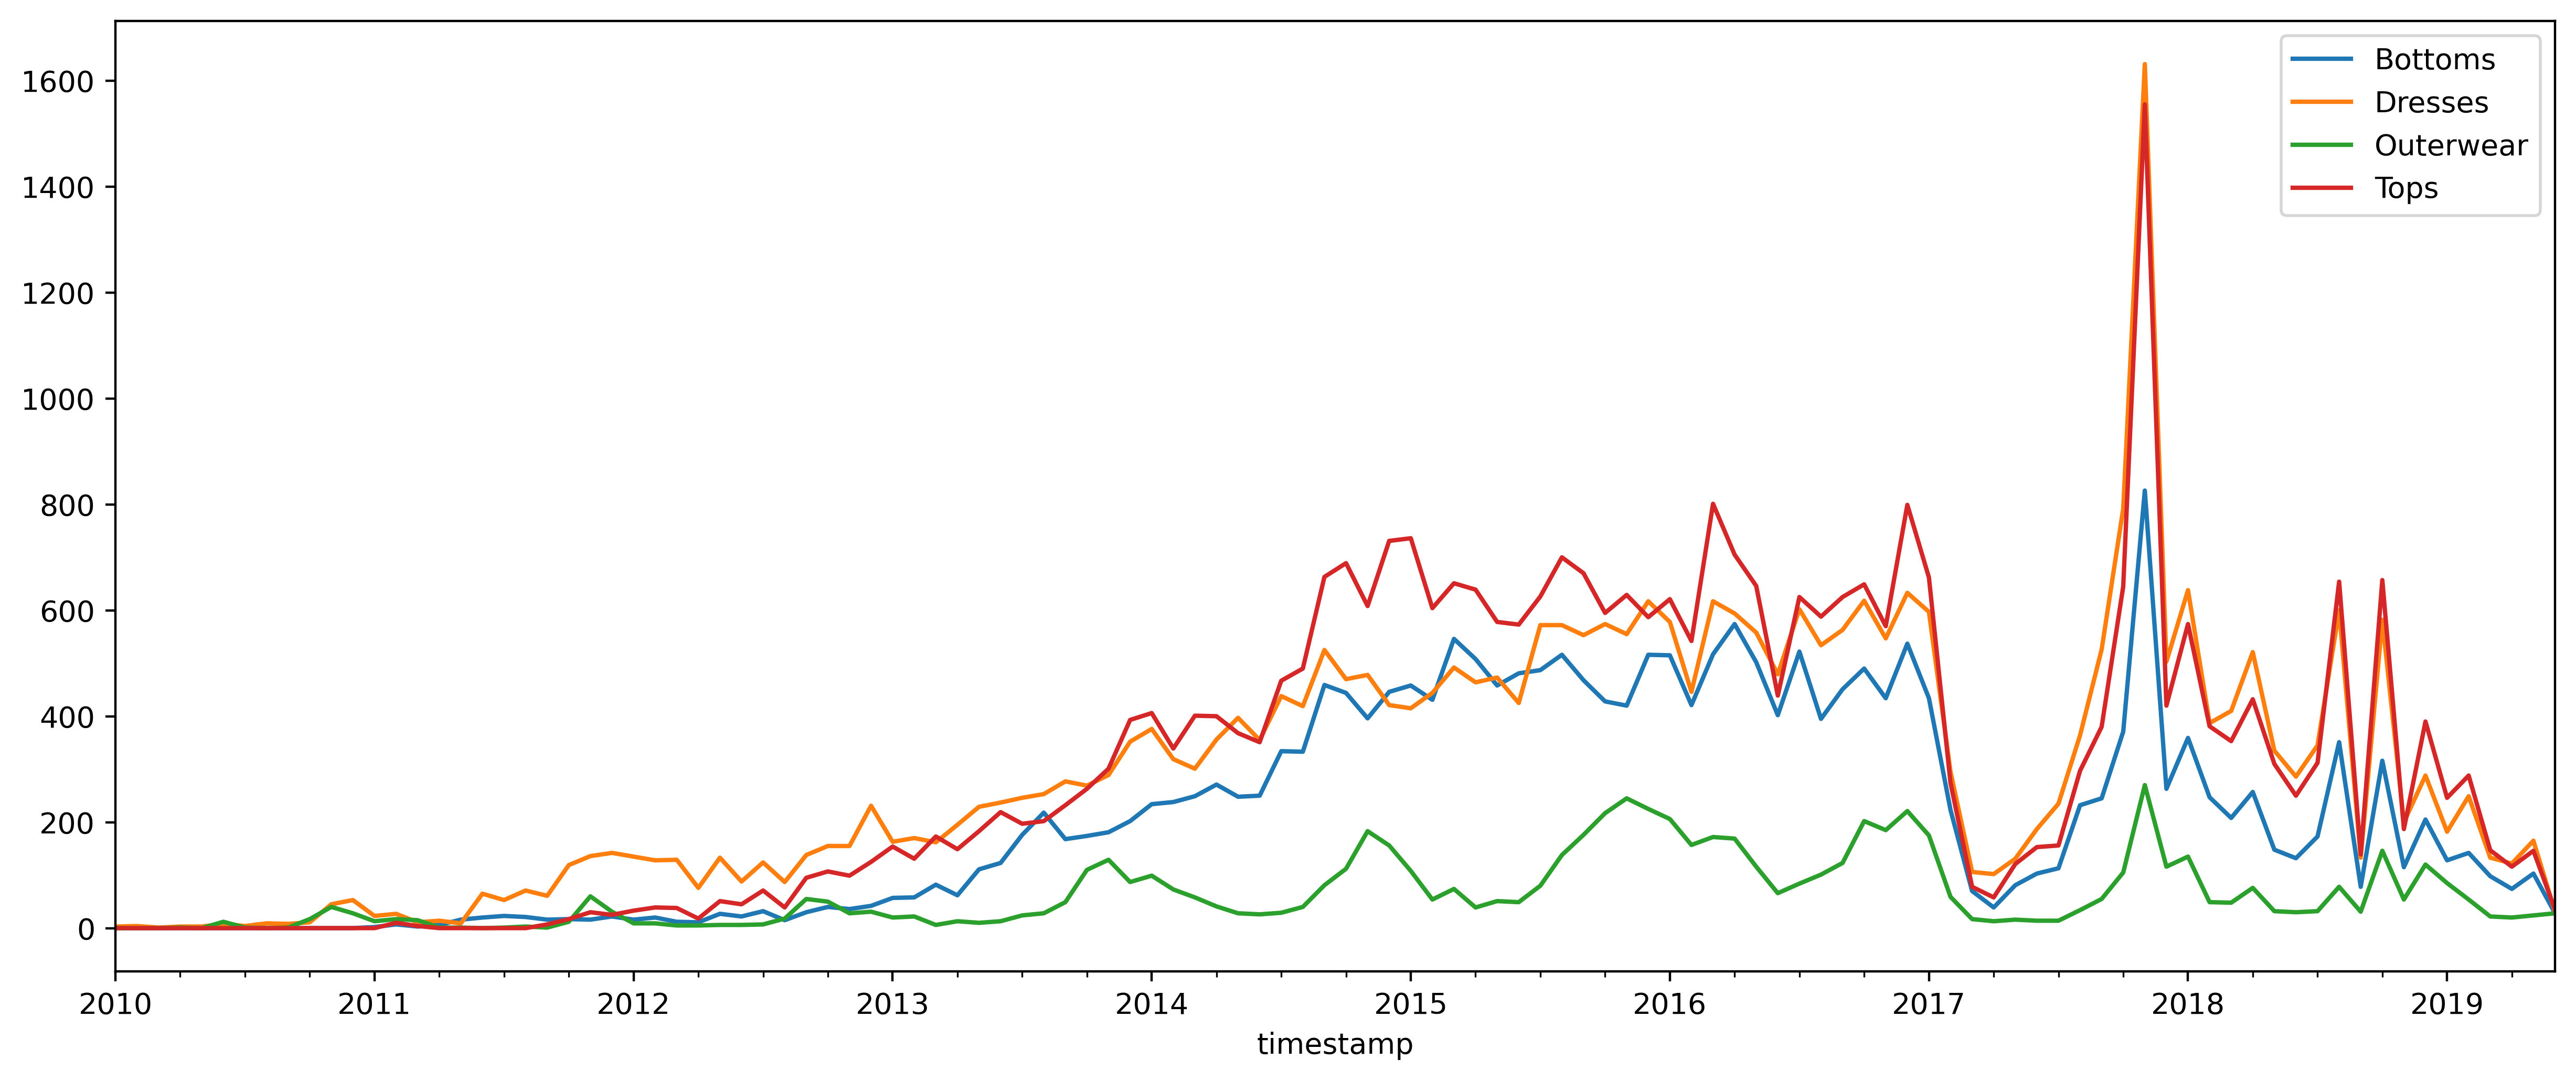

In [32]:
data.plot(x="timestamp",figsize=(15, 6))
plt.show()

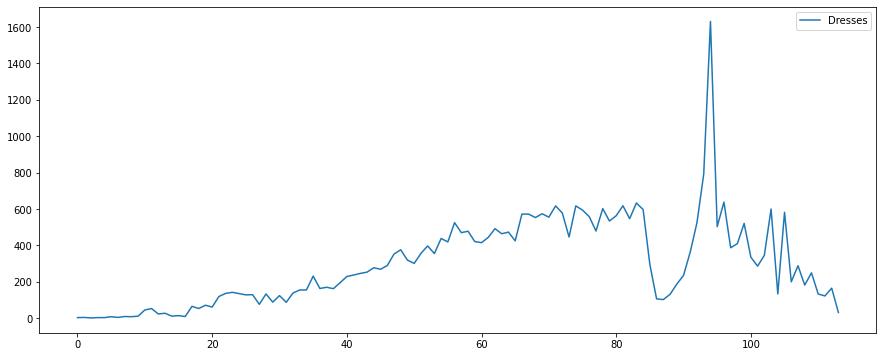

<Figure size 432x288 with 0 Axes>

In [14]:
data.plot(y="Dresses",figsize=(15, 6))
plt.show()
plt.savefig('time-series-plot.png')

## Time Series Analysis and Forecasting with Machine learning models

In [16]:
#assigning the train, test, label and features.

features = ['Dresses'] #features used
label = 'Dresses' # label
test_df = data_ml[data_ml['timestamp'] >= '2016-01'] # index for test data
train_df = data_ml[data_ml['timestamp'] < '2016-01'] # index for train data
X_train, y_train = train_df[features], train_df[label] #assign train data
X_test, y_test = test_df[features], test_df[label] # assign test data

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72, 1)
(72,)
(42, 1)
(42,)


### Building the first xgboost Model


In [18]:
## Xgb with set value learning_rate = 0.01
from xgboost import XGBRegressor

reg1 = XGBRegressor(n_estimators=100, learning_rate=0.01)
reg1.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:223.97314	validation_1-mae:421.02213
[1]	validation_0-mae:221.86803	validation_1-mae:417.71066
[2]	validation_0-mae:219.78561	validation_1-mae:414.37845
[3]	validation_0-mae:217.71986	validation_1-mae:411.12924
[4]	validation_0-mae:215.67320	validation_1-mae:407.91113
[5]	validation_0-mae:213.65157	validation_1-mae:404.71121
[6]	validation_0-mae:211.66423	validation_1-mae:401.52115
[7]	validation_0-mae:209.67499	validation_1-mae:398.40411
[8]	validation_0-mae:207.71129	validation_1-mae:395.25845
[9]	validation_0-mae:205.77919	validation_1-mae:392.15738
[10]	validation_0-mae:203.84492	validation_1-mae:389.12766
[11]	validation_0-mae:201.93587	validation_1-mae:386.06961
[12]	validation_0-mae:200.05905	validation_1-mae:383.04034
[13]	validation_0-mae:198.17885	validation_1-mae:380.08481
[14]	validation_0-mae:196.31242	validation_1-mae:377.17328
[15]	validation_0-mae:194.46558	validation_1-mae:374.29608
[16]	validation_0-mae:192.65663	validation_1-mae:371.39273
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction using the first xgboost.

In [19]:
predictions = reg1.predict(X_test)

In [20]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

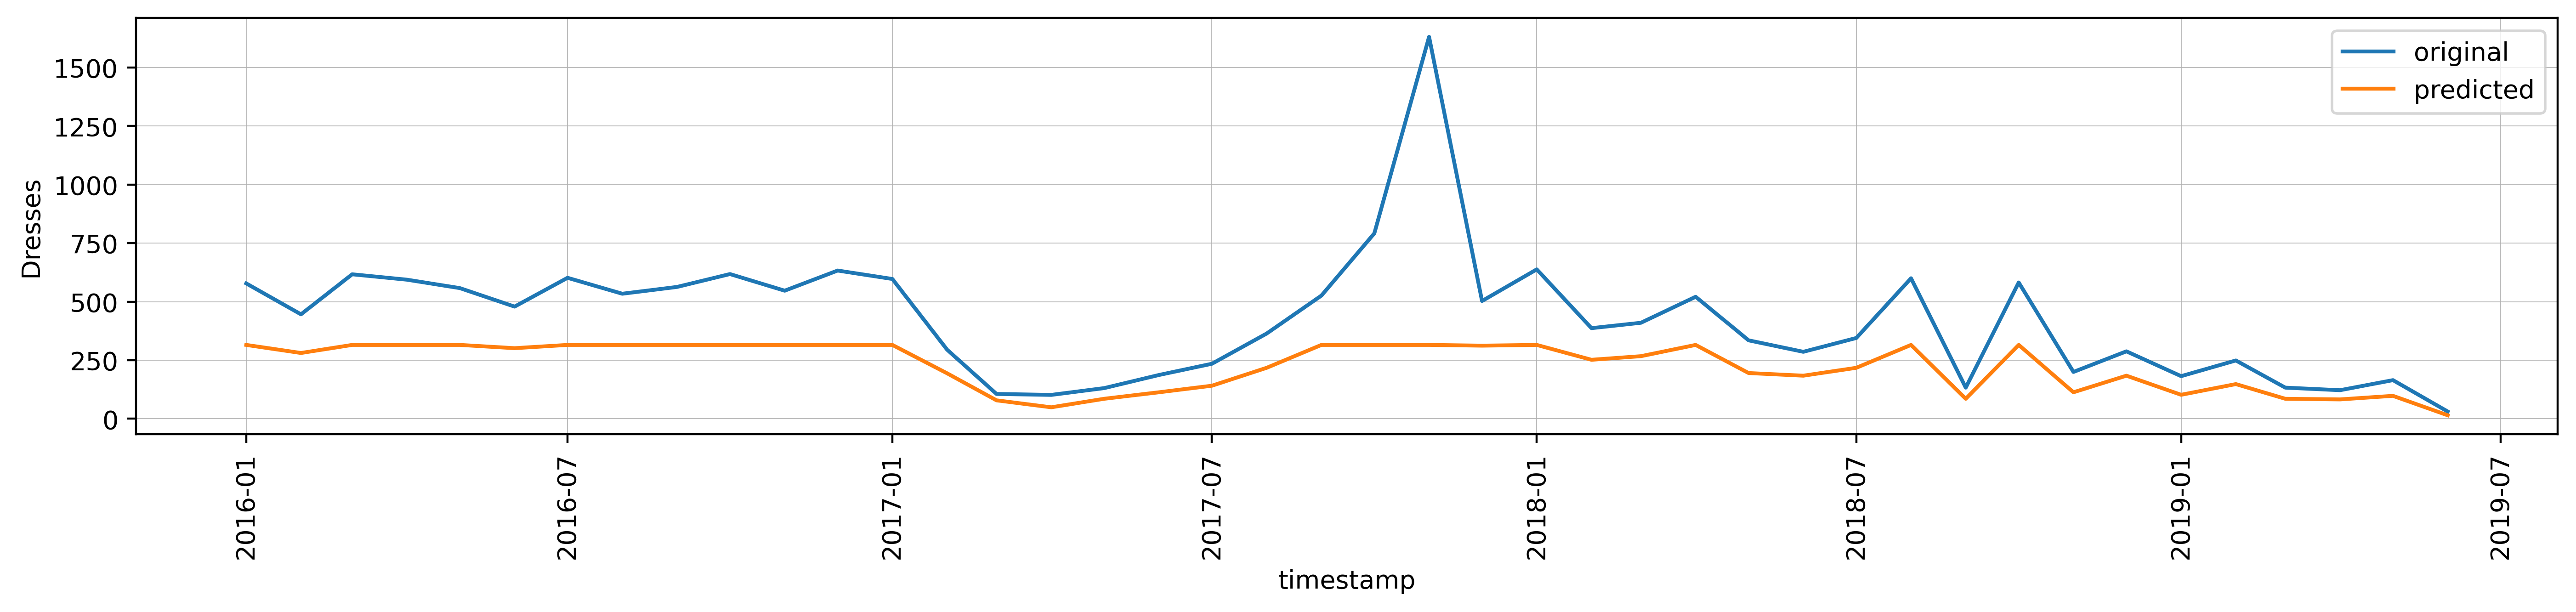

In [21]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='timestamp', y='Dresses', label = 'original')
sns.lineplot(data=test_df, x='timestamp', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE for the first xgboot model: ',metrics.mean_absolute_error(y_test, reg1.predict(X_test)))
print('RMSE for the first xgboot model:',np.sqrt(metrics.mean_squared_error(y_test, reg1.predict(X_test))))
print('MSE for the first xgboot model: ',metrics.mean_squared_error(y_test, reg1.predict(X_test)))

MAE for the first xgboot model:  199.14092004866828
RMSE for the first xgboot model: 284.14870656610213
MSE for the first xgboot model:  80740.48744318882


## Forecast of time series using the First xgboot model

In [23]:
#This step define function used to transform a time series dataset into a supervised learning dataset.
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=2, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [24]:
# Since we have build the model, in this stage we are going to use the whole set of data again, but only select the temperature column. 
#This is because we only want to do forecasting on the temperature column.

values = data_ml.Dresses.values #select column temperature.
preds = [] 
# this define the number of forecasting that we want. 10 indicates 10 new value will be forecasted. You can change it accordingly.
for i in range(20): 
    # transform the time series data into supervised learning. n_in=6 meaning you are using the first 6 value to forecast the value ahead
    forecast = series_to_supervised(values, n_in=6)
    # split into input and output columns
    forecastI, forecastO = forecast[:, :-1], forecast[:, -1]
    # fit model. Took back the value the we built before.
    model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    model.fit(forecastI, forecastO)
    # construct an input for a new preduction
    row = values[-6:].flatten()
    # make a prediction
    yhat = model.predict(np.asarray([row]))
    print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
    values = np.append(values, yhat)
    preds.append(yhat)
    
    test_df['ML Forecasting 1'] = pd.Series(preds)

Input: [182 249 133 122 165  31], Predicted: 182.955
Input: [249.         133.         122.         165.          31.
 182.95547485], Predicted: 48.165
Input: [133.         122.         165.          31.         182.95547485
  48.16460037], Predicted: 126.587
Input: [122.         165.          31.         182.95547485  48.16460037
 126.58722687], Predicted: 43.218
Input: [165.          31.         182.95547485  48.16460037 126.58722687
  43.21824265], Predicted: 112.992
Input: [ 31.         182.95547485  48.16460037 126.58722687  43.21824265
 112.99234772], Predicted: 46.014
Input: [182.95547485  48.16460037 126.58722687  43.21824265 112.99234772
  46.01351166], Predicted: 119.365
Input: [ 48.16460037 126.58722687  43.21824265 112.99234772  46.01351166
 119.36463928], Predicted: 52.527
Input: [126.58722687  43.21824265 112.99234772  46.01351166 119.36463928
  52.5267868 ], Predicted: 120.272
Input: [ 43.21824265 112.99234772  46.01351166 119.36463928  52.5267868
 120.27205658], Predict

### Building the second xgboost Model


In [53]:
## Xgb with set value learning_rate = 0.03
from xgboost import XGBRegressor

reg2 = XGBRegressor(n_estimators=100, learning_rate=0.9)
reg2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:40.17392	validation_1-mae:128.39192
[1]	validation_0-mae:13.84102	validation_1-mae:64.31834
[2]	validation_0-mae:6.12697	validation_1-mae:46.88695
[3]	validation_0-mae:3.36577	validation_1-mae:40.08172
[4]	validation_0-mae:2.48913	validation_1-mae:37.33885
[5]	validation_0-mae:1.78985	validation_1-mae:36.56421
[6]	validation_0-mae:1.52799	validation_1-mae:36.24209
[7]	validation_0-mae:1.14090	validation_1-mae:36.00164
[8]	validation_0-mae:0.95968	validation_1-mae:35.84870
[9]	validation_0-mae:0.82982	validation_1-mae:35.71256
[10]	validation_0-mae:0.68880	validation_1-mae:35.61510
[11]	validation_0-mae:0.51693	validation_1-mae:35.43455
[12]	validation_0-mae:0.35600	validation_1-mae:35.36182
[13]	validation_0-mae:0.30856	validation_1-mae:35.32377
[14]	validation_0-mae:0.23034	validation_1-mae:35.30296
[15]	validation_0-mae:0.19845	validation_1-mae:35.29010
[16]	validation_0-mae:0.15962	validation_1-mae:35.28648
[17]	validation_0-mae:0.12226	validation_1-mae:35.25608

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction using the second xgboost.

In [54]:
predictions_2 = reg2.predict(X_test)

In [55]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions 2'] = pd.Series(predictions_2)

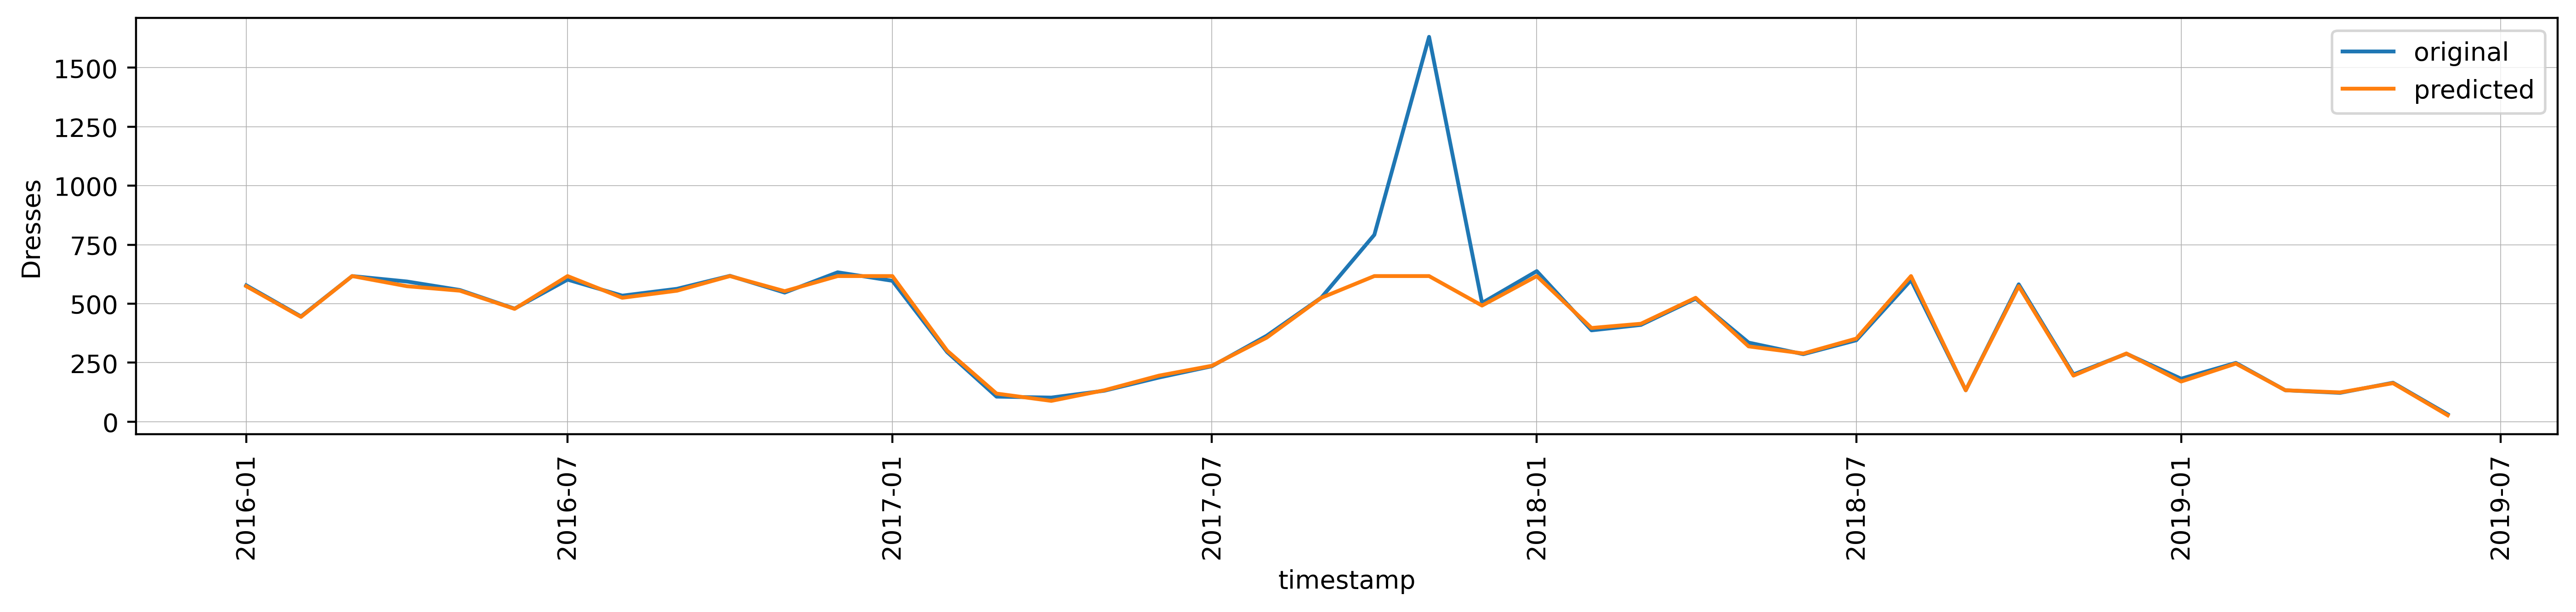

In [56]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='timestamp', y='Dresses', label = 'original')
sns.lineplot(data=test_df, x='timestamp', y='predictions 2', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [57]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE for the second xgboot model: ',metrics.mean_absolute_error(y_test, reg2.predict(X_test)))
print('RMSE for the second xgboot model:',np.sqrt(metrics.mean_squared_error(y_test, reg2.predict(X_test))))
print('MSE for the second xgboot model: ',metrics.mean_squared_error(y_test, reg2.predict(X_test)))

MAE for the second xgboot model:  35.21471268790109
RMSE for the second xgboot model: 159.04682005017833
MSE for the second xgboot model:  25295.890968073803


## Forecast of time series using the Second xgboot model

In [58]:
# Since we have build the model, in this stage we are going to use the whole set of data again, but only select the temperature column. 
#This is because we only want to do forecasting on the temperature column.

values = data_ml.Dresses.values #select column temperature.
preds = [] 
# this define the number of forecasting that we want. 10 indicates 10 new value will be forecasted. You can change it accordingly.
for i in range(20): 
    # transform the time series data into supervised learning. n_in=6 meaning you are using the first 6 value to forecast the value ahead
    forecast = series_to_supervised(values, n_in=6)
    # split into input and output columns
    forecastI, forecastO = forecast[:, :-1], forecast[:, -1]
    # fit model. Took back the value the we built before.
    model = XGBRegressor(n_estimators=100, learning_rate=0.3)
    model.fit(forecastI, forecastO)
    # construct an input for a new preduction
    row = values[-6:].flatten()
    # make a prediction
    yhat = model.predict(np.asarray([row]))
    print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
    values = np.append(values, yhat)
    preds.append(yhat)
    
    test_df['ML Forecasting 2'] = pd.Series(preds)

Input: [182 249 133 122 165  31], Predicted: 202.533
Input: [249.         133.         122.         165.          31.
 202.53305054], Predicted: 70.057
Input: [133.         122.         165.          31.         202.53305054
  70.05702972], Predicted: 134.956
Input: [122.         165.          31.         202.53305054  70.05702972
 134.95559692], Predicted: 104.285
Input: [165.          31.         202.53305054  70.05702972 134.95559692
 104.28450012], Predicted: 173.281
Input: [ 31.         202.53305054  70.05702972 134.95559692 104.28450012
 173.28114319], Predicted: 46.418
Input: [202.53305054  70.05702972 134.95559692 104.28450012 173.28114319
  46.41802597], Predicted: 179.217
Input: [ 70.05702972 134.95559692 104.28450012 173.28114319  46.41802597
 179.21655273], Predicted: 71.456
Input: [134.95559692 104.28450012 173.28114319  46.41802597 179.21655273
  71.45604706], Predicted: 134.898
Input: [104.28450012 173.28114319  46.41802597 179.21655273  71.45604706
 134.89813232], Predi

In [60]:
# save prediction and forecasting results for visualization purposes

#n=30
#X=114

#final_df =pd.DataFrame()

#predictions = reg1.predict(X_train)
#predictions_2 = reg2.predict(X_train)
#final_df['predictions ML 1'] = pd.Series(predictions)
#final_df['predictions ML 2'] = pd.Series(predictions_2)

#predictions = reg1.predict(X_test)
#predictions_2 = reg2.predict(X_test)
#final_df['predictions ML 1_2'] = pd.Series(predictions)
#final_df['predictions ML 2_2'] = pd.Series(predictions_2)

#final_df_1 = pd.DataFrame({'Predict First AIRMA model':results.predict(),'Predict Second AIRMA model':results_2.predict()},index=pd.date_range(start='2010-01', periods=X, freq='MS'))
#final_df_2 = pd.DataFrame({'Forecast First AIRMA model':results.forecast(steps=n),'Forecast Second AIRMA model':results_2.forecast(steps=n)},index=pd.date_range(start='2019-05', periods=n, freq='MS'))

# storing into the excel file
#final_df.to_excel("ml.xlsx")
#test_df.to_excel("ml_Forecasting .xlsx")
#final_df_1.to_excel("Prediction.xlsx")
#final_df_2.to_excel("Forecast.xlsx")
